In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('netflix_titles.csv')
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [17]:
#number of shows in the dataset
data['show_id'].count()

6234

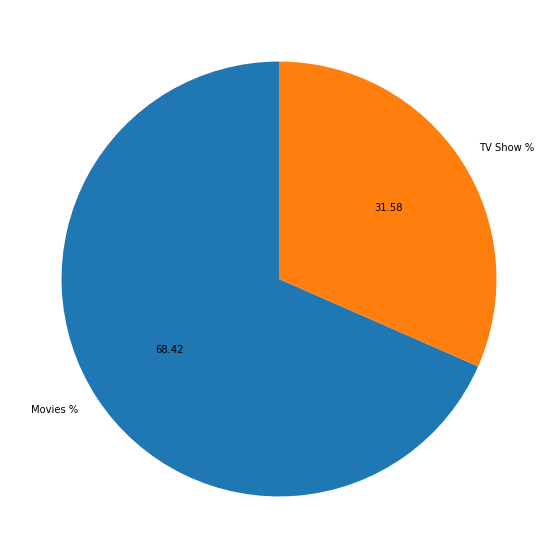

In [18]:
#distribution of TV shows and Movies
import matplotlib.pyplot as plt
type_count = data['type'].value_counts()
ser_labels = 'Movies %', 'TV Show %'
plt.figure(figsize=(15,10))
plt.pie(type_count, labels = ser_labels, autopct='%1.2f', startangle=90)
plt.show()

In [19]:
'''
splits comma seperated values into seperate columns similar to One Hot Encoding 
and returns the sorted dataframe with the count of each occurence
'''

def ohe_split(col_name):
    column_split = data[col_name].str.split('\s*,\s*', expand=True).stack().str.get_dummies().sum(level=0)
    column_count = {}
    for column in column_split:
        column_count[column] = (column_split[column].values == 1).sum()
    col_count_df = pd.DataFrame(column_count.items(), columns=[col_name, 'count'])
    sorted_df = col_count_df.sort_values('count', ascending=False)
    return sorted_df

In [21]:
top_directors = ohe_split('director').head(5)
top_directors

,director,count
1389,Jan Suter,21
2781,Raúl Campos,19
2110,Marcus Raboy,14
1424,Jay Karas,14
1422,Jay Chapman,12


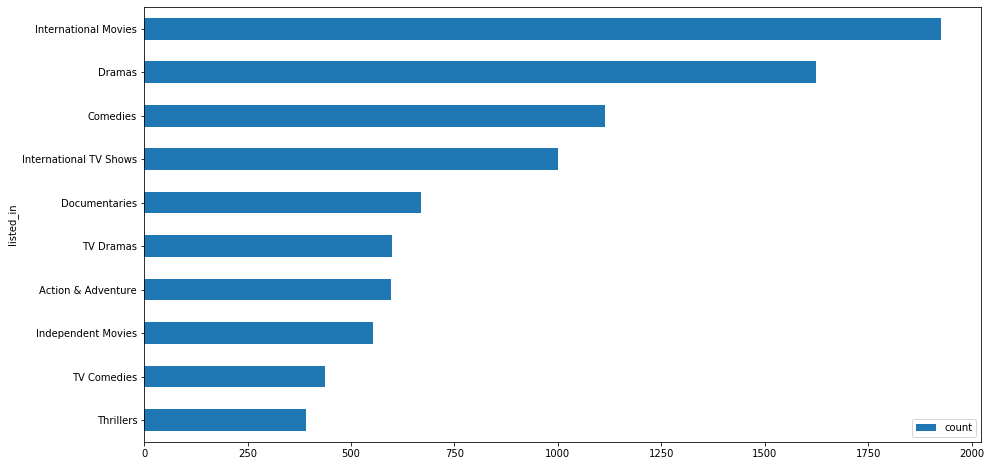

In [22]:
top_genres = ohe_split('listed_in').head(10)
top_genres = top_genres.sort_values('count')
ax = top_genres.plot.barh(x='listed_in', y='count',figsize=(15,8))

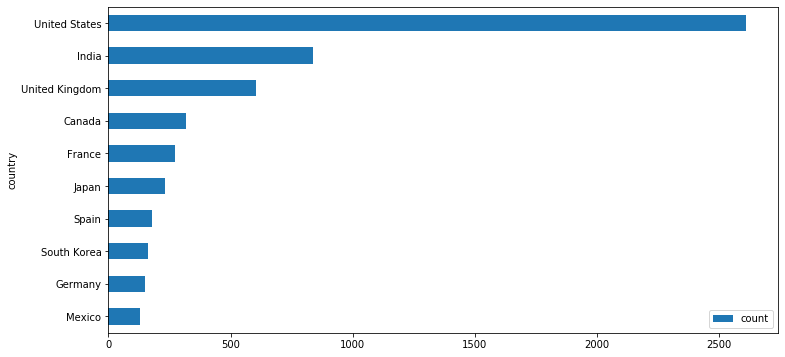

In [33]:
countries_count = ohe_split('country').head(10)
countries_count = countries_count.sort_values('count')
ax1 = countries_count.plot.barh(x='country', y='count',figsize=(12,6))

In [24]:
# distribution of movie and tv show time
movies = data[data['type'] == 'Movie']
tv_series = data[data['type'] == 'TV Show']

Text(0.5, 0, 'Duration in secs')

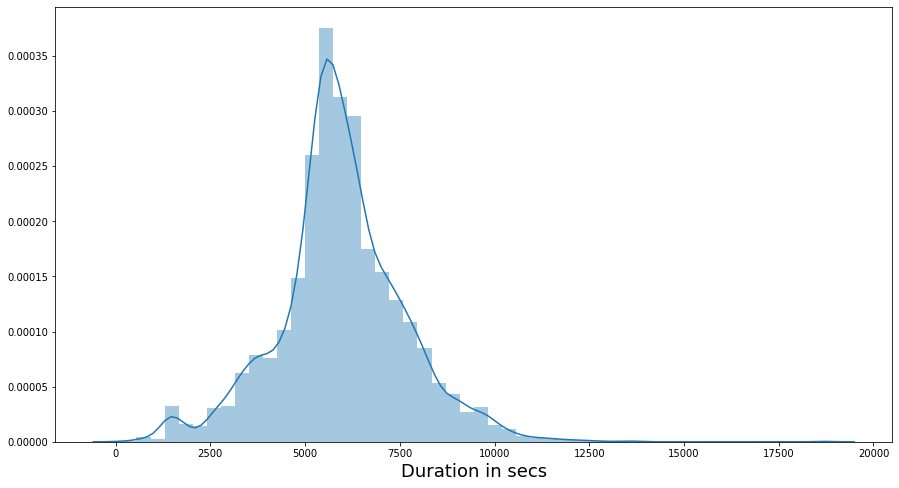

In [25]:
#for movies converting data type from string to seconds so that time is normalised
movies['duration'] = movies['duration'].map(lambda x: x.rstrip(' min'))

movies['duration'] = movies['duration'].astype('int64')

movies['duration'] = movies['duration'].map(lambda x: x*60)

plt.figure(figsize=(15,8))

sns.distplot(movies['duration'], label="New_Formula")
plt.xlabel('Duration in secs', fontsize=18)

#### Movie time follows a normal distribution with most number of movies in the range of 5000 secs to 7500 secs(1 hrs 38 mins to 2 hrs)

In [26]:
tv_series['duration'] = tv_series['duration'].map(lambda x: x.rstrip(' Season'))

In [27]:
tv_series['duration'] = tv_series['duration'].astype('int64')

Text(0.5, 0, 'Duration in secs')

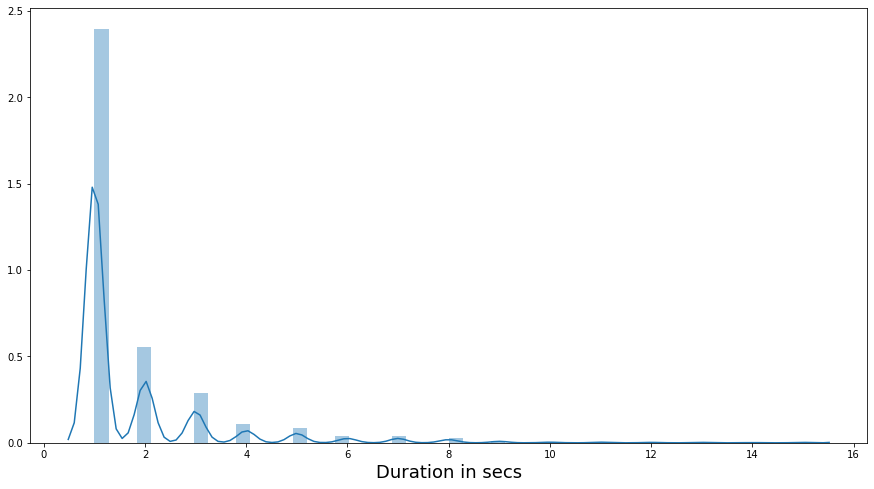

In [30]:
plt.figure(figsize=(15,8))

sns.distplot(tv_series['duration'])
plt.xlabel('Duration in secs', fontsize=18)

#### Most of the series had 1 to 4 seasons. Some series had 15 seasons too

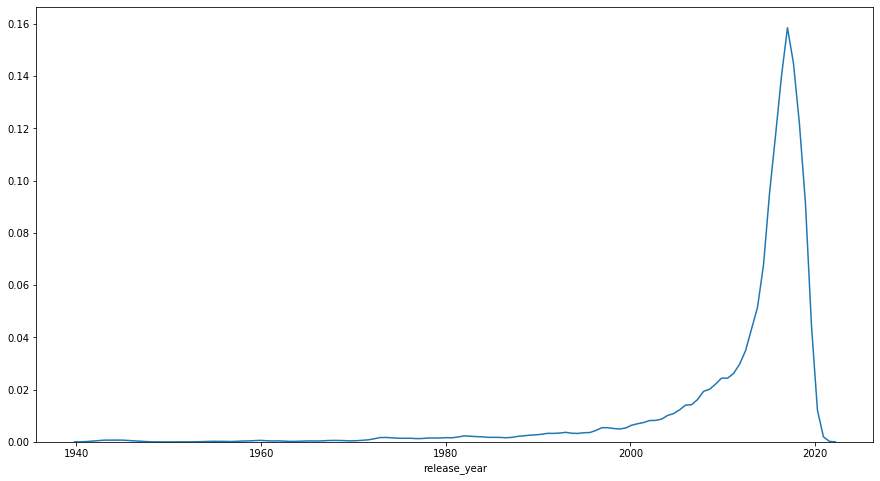

In [31]:
plt.figure(figsize=(15,8))
sns.distplot(movies['release_year'],hist=False,norm_hist = 0)

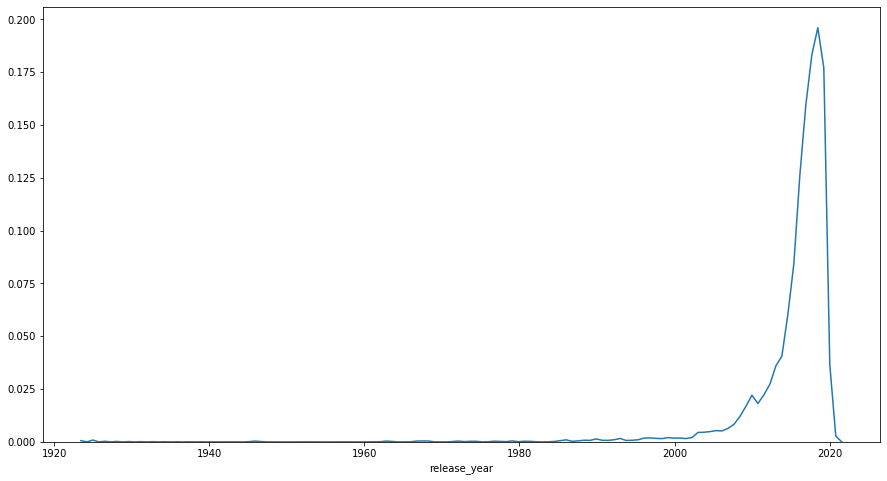

In [126]:
plt.figure(figsize=(15,8))
sns.distplot(tv_series['release_year'],hist=False,norm_hist = 0)

### We can also analyse the content added over the years on Netflix by 'date_added' feature

In [127]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [135]:
data['year_added'] = data['date_added'].map(lambda x: x.year)

In [137]:
movies = data[data['type'] == 'Movie']
series = data[data['type'] == 'TV Show']

In [164]:
movies_added = movies['year_added'].value_counts()
series_added = series['year_added'].value_counts()

In [172]:
movies_added.name = 'movies_added'

In [173]:
series_added.name = 'series_added'

In [191]:
time_series = pd.concat([movies_added, series_added], axis=1).reset_index()

In [192]:
time_series = time_series.fillna(0)

In [193]:
time_series['index'] = time_series['index'].astype('int64')
time_series['movies_added'] = time_series['movies_added'].astype('int64')
time_series['series_added'] = time_series['series_added'].astype('int64')

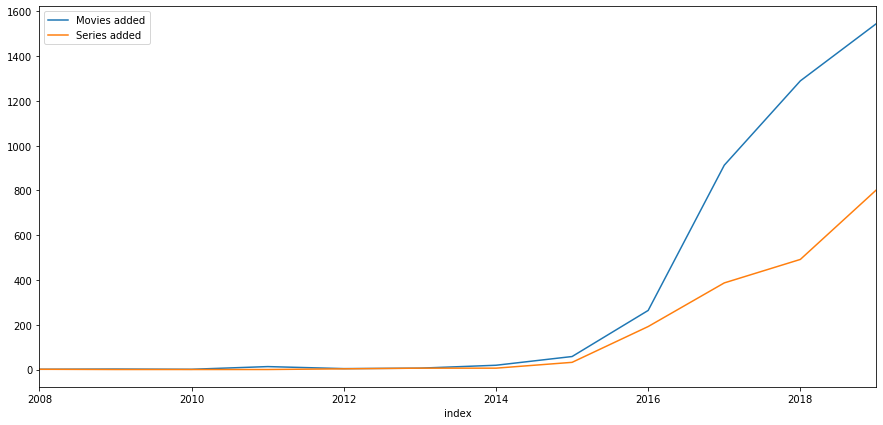

In [208]:
time_series = time_series[time_series['index'] != 2020]

ax = time_series.plot(x='index', y=['movies_added','series_added'], figsize=(15,7))

ax.legend(["Movies added", "Series added"]);